In [1]:
import pickle
import pandas as pd
import numpy as np
import pingouin as pg
import torch
att_path = '/projects/CIBCIGroup/00DataUploading/Liang/fuzzy_fnirs/Friends_fNIRS_Fuzzy/output/output_all.pkl'
data_index_path = '/home/xiaowjia/data/Friends_fNIRS/data/temp1/data_index_table_val.csv'
att_method= torch.mean
data_index = pd.read_csv(data_index_path)
output = pickle.load(open(att_path, 'rb'))
centers = output['centers']
converted_centers = output['converted_centers']
correct_att = att_method(output['all_atten'][output['correct_ind']],-2).numpy()
print(correct_att.shape)
correct_att = np.concatenate([correct_att[:, :40, :], correct_att[:, 40:, :]], axis=0)
correct_res = output['res'].iloc[output['correct_ind']]
correct_res = pd.concat([correct_res, correct_res], axis=0)
correct_data_index = data_index.iloc[output['correct_ind']]
correct_data_index = pd.concat([correct_data_index, correct_data_index], axis=0)
correct_att = {i:correct_att[correct_res['label'] == i] for i in correct_res['label'].unique()}
res_all = [] # ichannel, irule, t, p, df, mean0, mean1, std0, std1, effect_size(up2) BF10
t_values = np.empty((correct_att[0].shape[1], correct_att[0].shape[2]))
for ichannel in range(correct_att[0].shape[1]):
    for irule in range(correct_att[0].shape[2]):
        # run independent t-test
        d1 = correct_att[0][:, ichannel, irule]
        d2 = correct_att[1][:, ichannel, irule]
        stat = pg.ttest(correct_att[0][:, ichannel, irule], correct_att[1][:, ichannel, irule])
        up2 = pg.compute_effsize(d1, d2, eftype='eta-square')
        res_all.append([ichannel, irule, stat['T'].values[0], stat['p-val'].values[0], stat['dof'].values[0], d1.mean(), d2.mean(), d1.std(), d2.std(), up2, stat['BF10'].values[0]])
        t_values[ichannel, irule] = stat['T'].values[0]
res_all = pd.DataFrame(res_all, columns=['ichannel', 'irule', 't', 'p', 'df', 'mean0', 'mean1', 'std0', 'std1', 'effect_size', 'BF10'])
res_all = res_all.sort_values('p', ascending=True)
np.save('../output/t_values.npy', t_values)

/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


(6056, 80, 10)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
ch_names = ['S1_D1 hbo', 'S1_D1 hbr', 'S1_D2 hbo', 'S1_D2 hbr', 'S2_D1 hbo', 'S2_D1 hbr', 'S2_D3 hbo', 'S2_D3 hbr', 'S3_D2 hbo', 'S3_D2 hbr', 'S3_D3 hbo', 'S3_D3 hbr', 'S3_D4 hbo', 'S3_D4 hbr', 'S4_D2 hbo', 'S4_D2 hbr', 'S4_D4 hbo', 'S4_D4 hbr', 'S4_D5 hbo', 'S4_D5 hbr', 'S5_D3 hbo', 'S5_D3 hbr', 'S5_D4 hbo', 'S5_D4 hbr', 'S5_D6 hbo', 'S5_D6 hbr', 'S6_D4 hbo', 'S6_D4 hbr', 'S6_D5 hbo', 'S6_D5 hbr', 'S6_D6 hbo', 'S6_D6 hbr', 'S7_D5 hbo', 'S7_D5 hbr', 'S7_D7 hbo', 'S7_D7 hbr', 'S8_D6 hbo', 'S8_D6 hbr', 'S8_D7 hbo', 'S8_D7 hbr']
fig = plt.figure(figsize=(15,5))
sns.heatmap(np.abs(t_values.T), cmap='jet', xticklabels=ch_names, yticklabels=range(10.))

TypeError: 'float' object cannot be interpreted as an integer

<Figure size 1500x500 with 0 Axes>

               T          dof alternative     p-val          CI95%   cohen-d  \
T-test -3.363279  7240.847253   two-sided  0.000774  [-0.01, -0.0]  0.075542   

         BF10     power  
T-test  7.043  0.926263  


/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


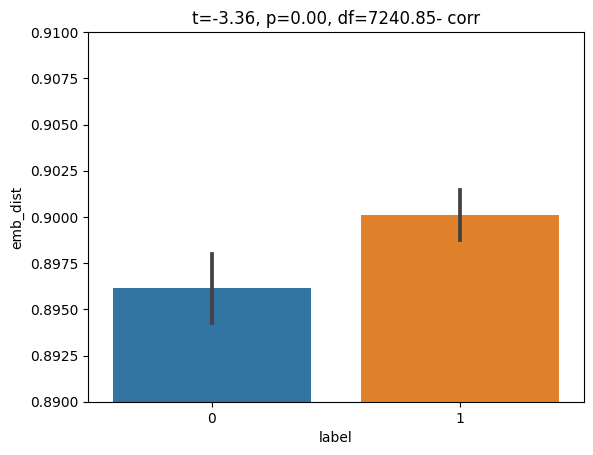

               T          dof alternative     p-val          CI95%   cohen-d  \
T-test -3.351581  7243.256827   two-sided  0.000808  [-0.01, -0.0]  0.075277   

         BF10     power  
T-test  6.773  0.924578  


/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


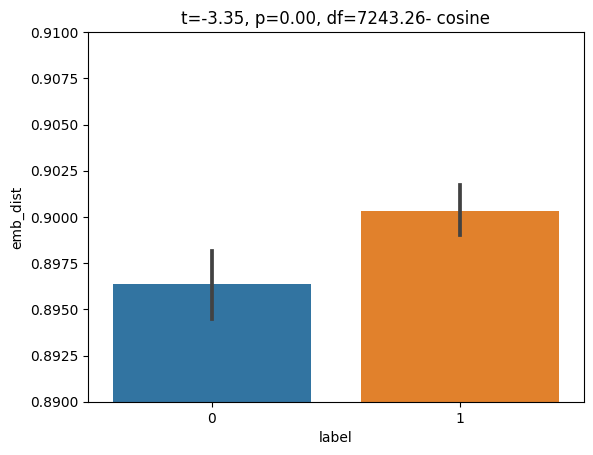

               T          dof alternative     p-val         CI95%   cohen-d  \
T-test  1.737619  7555.476967   two-sided  0.082319  [-0.0, 0.01]  0.038874   

         BF10     power  
T-test  0.113  0.418523  


/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/xiaowjia/miniconda3/envs/dl_pl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


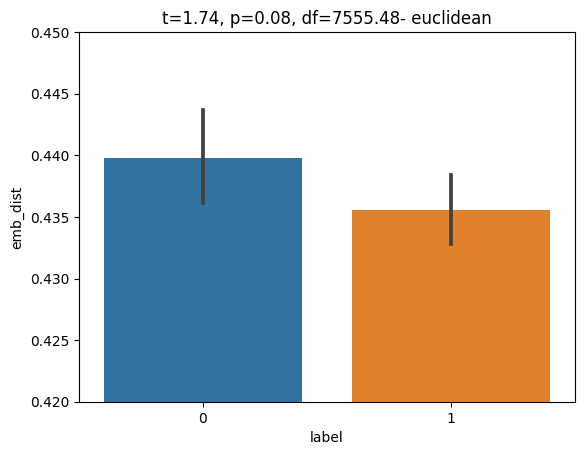

In [31]:
from minepy import MINE
mine = MINE(alpha=0.6, c=15, est="mic_approx")

def distance(emb, metric='euclidean'):
    x = emb[emb.shape[0]//2:]
    y = emb[:emb.shape[0]//2]
    # normalize
    x = x/np.linalg.norm(x)
    y = y/np.linalg.norm(y)

    if metric == 'euclidean':
        return np.sqrt(np.sum((x-y)**2))
    elif metric == 'cosine':
        return np.abs(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
    elif metric == 'manhattan':
        return np.sum(np.abs(x-y))
    elif metric == 'corr':
        return np.corrcoef(x,y)[0,1]
    elif metric == 'mi':
        mine.compute_score(x,y)
        return  mine.mic()

embs = output['embs']
res = output['res']

for metric in ['corr', 'cosine', 'euclidean']:
    emb_dist = [distance(embs[i],metric = metric) for i in range(len(embs))]
    res['emb_dist'] = emb_dist

    import seaborn as sns
    import matplotlib.pyplot as plt
    import pingouin as pg
    stat = pg.ttest(res[res['label']==0]['emb_dist'], res[res['label']==1]['emb_dist'])
    print(stat)
    sns.barplot(x='label', y='emb_dist', data=res)
    if metric == 'corr':
        plt.ylim([0.89, 0.91])
    elif metric == 'cosine':
        plt.ylim([0.89, 0.91])
    elif metric == 'euclidean':
        plt.ylim([0.42, 0.45])
    plt.title(f"t={stat['T'].values[0]:.2f}, p={stat['p-val'].values[0]:.2f}, df={stat['dof'].values[0]:.2f}- {metric}")
    plt.savefig(f'../output/emb_dist_{metric}.svg')
    plt.show()